________________________________________________________________________________________________________________________________

## **Building Machine Learning Model**

## **Importing library**

In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## **Importing Datasets**

In [5]:
df=pd.read_csv('Datasets/ML case Study.csv')
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [6]:
df_city=pd.read_csv('Datasets/cities.csv')
df_city.head()


,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [7]:
df_college=pd.read_csv('Datasets/Colleges.csv')
df_college.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


## **Adding cities and Collages data in df**

In [8]:
# Function to assign tier labels to colleges based on 'college_df'.

def assign_tier(row):
    if row['College'] in df_college['Tier 1'].values:
        return 'Tier 1'
    elif row['College'] in df_college['Tier 2'].values:
        return 'Tier 2'
    elif row['College'] in df_college['Tier 3'].values:
        return 'Tier 3'
    else:
        return 'Unknown'

In [9]:
# Function to assign a city type based on 'city_df'.

def assign_city(row):
    if row['City'] in df_city['Metrio City'].values:
        return 1
    elif row['City'] in df_city['non-metro cities'].values:
        return 0
    else:
        return 'unknown'

In [10]:
# Creating  a 'metro_city' , 'Tier' column in the 'df' dataframe.
df['metro_city'] = df.apply(assign_city, axis=1)
df['Tier'] = df.apply(assign_tier, axis=1)

In [11]:
df.head(100)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,0,Tier 2
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,0,Tier 2
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,0,Tier 3
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,0,Tier 3
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,0,Tier 1
...,...,...,...,...,...,...,...,...,...,...
95,IIT Delhi,Ahmedabad,Executive,59707.0,3,70,28,56003.61,1,Tier 1
96,IIEST/BESU Shibpur,Bangalore,Executive,57726.0,4,84,54,68673.29,1,Tier 2
97,IIT Roorkee,Delhi,Executive,58401.0,4,45,55,76028.50,1,Tier 1
98,NSUT Delhi (NSIT),Durgapur,Manager,41228.0,2,64,56,87418.05,0,Tier 1


## **EDD**

**EDD of the ML case study Data**

In [12]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.514160
std,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.499957
min,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000,1.000000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000,1.000000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
 8   metro_city           1589 non-null   int64  
 9   Tier                 1589 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 124.3+ KB


## **Data Preprocessing**

### **Crateing Dummy variable and removing unwanted columns**

In [14]:
df = pd.get_dummies(df,columns = ["Role","Tier"],drop_first = True) 
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Role_Manager,Tier_Tier 2,Tier_Tier 3
0,SVNIT Surat,Asansol,55523.0,3,66,19,71406.58,0,True,True,False
1,NIT Bhopal,Ajmer,57081.0,1,84,18,68005.87,0,False,True,False
2,"IEM, Kolkata",Rajpur Sonarpur,60347.0,2,52,28,76764.02,0,False,False,True
3,"KIIT, Bhubaneswar",Ajmer,49010.0,2,81,33,82092.39,0,False,False,True
4,DTU,Durgapur,57879.0,4,74,32,73878.10,0,False,False,False


In [15]:
del df['City']
del df['College']
df.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Role_Manager,Tier_Tier 2,Tier_Tier 3
0,55523.0,3,66,19,71406.58,0,True,True,False
1,57081.0,1,84,18,68005.87,0,False,True,False
2,60347.0,2,52,28,76764.02,0,False,False,True
3,49010.0,2,81,33,82092.39,0,False,False,True
4,57879.0,4,74,32,73878.10,0,False,False,False


### **Visualizing Data**

<Axes: xlabel='Previous CTC', ylabel='CTC'>

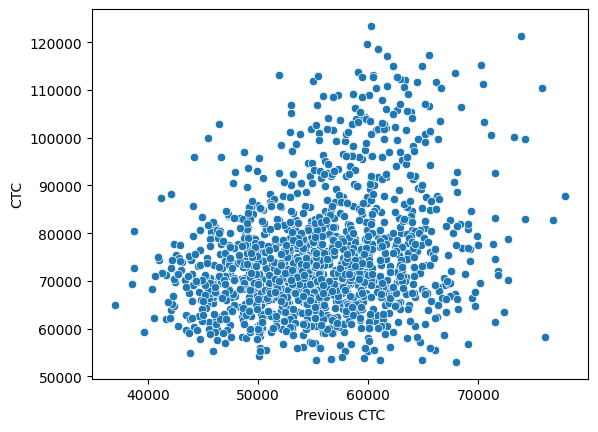

In [16]:
# scatter plot for previous CTC
sns.scatterplot(x = df['Previous CTC'], y = df['CTC'])

<Axes: xlabel='Previous job change', ylabel='CTC'>

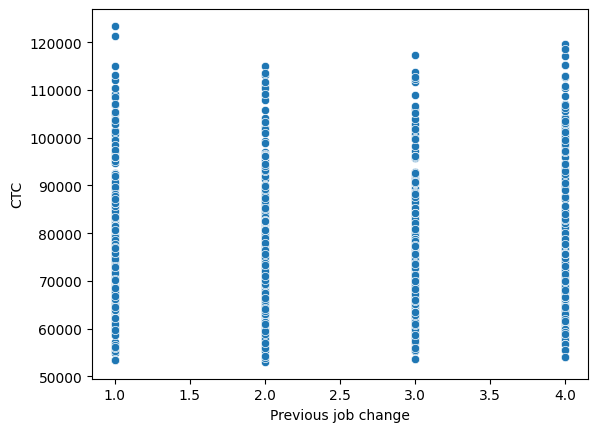

In [17]:
sns.scatterplot(x = 'Previous job change', y = 'CTC', data = df)

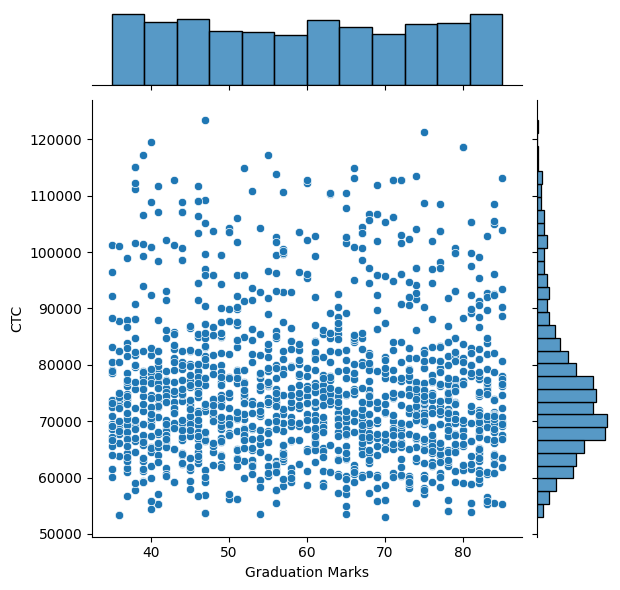

In [18]:
# scatter plot for previous Graduation Marks
sns.jointplot(x = df['Graduation Marks'], y= df['CTC'])

<Axes: xlabel='Role_Manager', ylabel='count'>

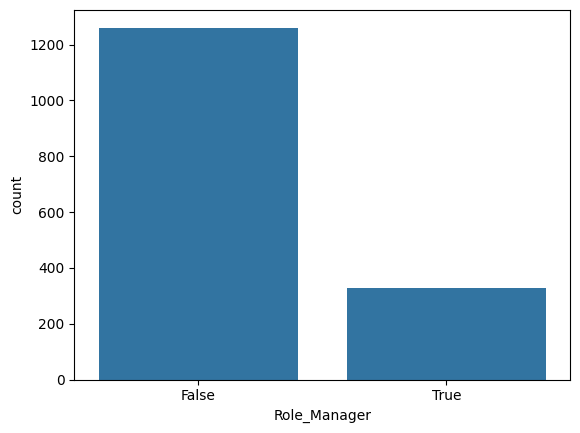

In [19]:
sns.countplot(x='Role_Manager',data=df)

C:\Users\Rutik\AppData\Local\Temp\ipykernel_4964\4070908615.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CTC'])


<Axes: xlabel='CTC', ylabel='Density'>

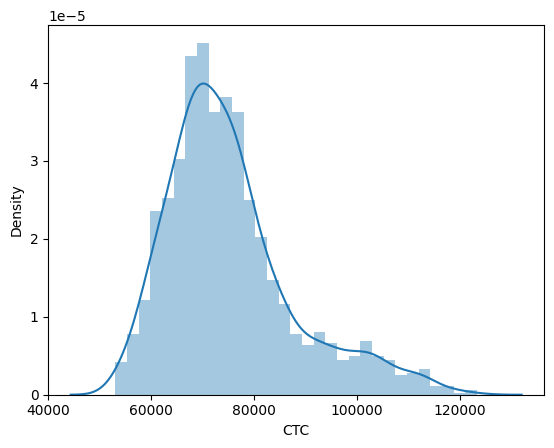

In [20]:
sns.distplot(df['CTC'])

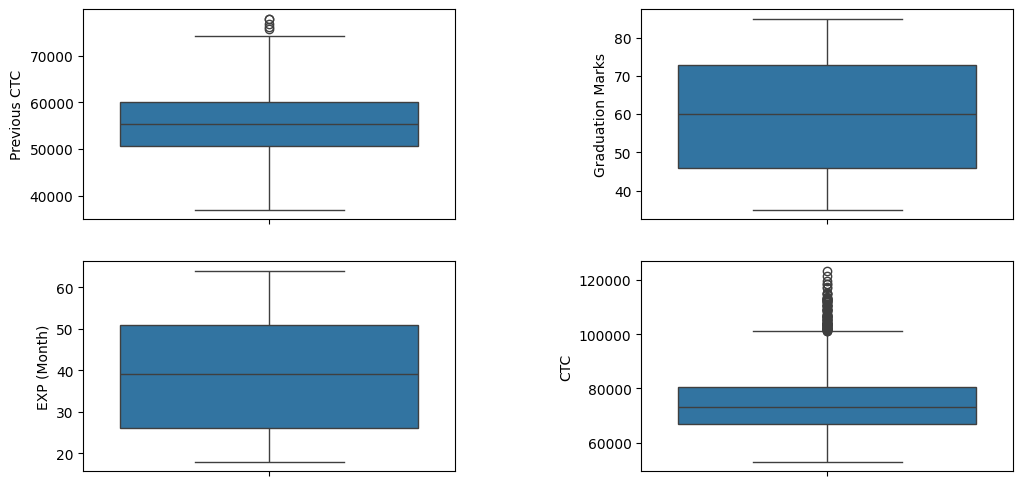

In [21]:
numerical_columns = ['Previous CTC', 'Graduation Marks', 'EXP (Month)', 'CTC']
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.5)
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=col)

plt.show()

### **Outliers Detection and Treatment**

In [22]:
# Calculate the 99th Percentile
upper_limit = np.percentile(df['Previous CTC'], [99])[0]
upper_limit2 = np.percentile(df['CTC'], [99])[0]

In [23]:
# Identify Outliers
df[(df['Previous CTC'] > upper_limit)].head()
df[(df['CTC'] > upper_limit2)].head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Role_Manager,Tier_Tier 2,Tier_Tier 3
34,60894.0,4,80,28,118651.89,0,True,False,False
185,70258.0,4,38,36,115126.75,0,True,True,False
254,51912.0,2,66,50,113141.14,1,True,True,False
328,62264.0,2,52,64,114996.23,0,True,False,True
543,73856.0,1,75,54,121362.73,1,True,False,False


In [24]:
# Cap Outliers
df['Previous CTC'][(df['Previous CTC'] > 3*upper_limit)] = 3*upper_limit
df['CTC'][(df['CTC'] > 3*upper_limit2)] = 3*upper_limit2

C:\Users\Rutik\AppData\Local\Temp\ipykernel_4964\2439585987.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Previous CTC'][(df['Previous CTC'] > 3*upper_limit)] = 3*upper_limit
C:\Users\Rutik\AppData\Local\Temp\ipykernel_4964\2439585

In [25]:
df.corr()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Role_Manager,Tier_Tier 2,Tier_Tier 3
Previous CTC,1.000000,0.005756,-0.032976,0.119163,0.258000,0.004644,0.012321,-0.010947,0.042438
Previous job change,0.005756,1.000000,0.019267,0.023488,0.011370,0.051670,-0.017150,0.004271,-0.050794
Graduation Marks,-0.032976,0.019267,1.000000,-0.057061,-0.005450,-0.018616,0.017858,-0.018419,0.012021
EXP (Month),0.119163,0.023488,-0.057061,1.000000,0.301115,-0.023613,-0.026751,-0.014558,0.017427
CTC,0.258000,0.011370,-0.005450,0.301115,1.000000,-0.020365,0.621311,0.012346,-0.032149
metro_city,0.004644,0.051670,-0.018616,-0.023613,-0.020365,1.000000,-0.048671,0.022917,-0.024288
Role_Manager,0.012321,-0.017150,0.017858,-0.026751,0.621311,-0.048671,1.000000,-0.004865,-0.010706
Tier_Tier 2,-0.010947,0.004271,-0.018419,-0.014558,0.012346,0.022917,-0.004865,1.000000,-0.465741
Tier_Tier 3,0.042438,-0.050794,0.012021,0.017427,-0.032149,-0.024288,-0.010706,-0.465741,1.000000


## **Defining X and Y Variables**
- **Defining Independent Variables to X and Dependent Variable to Y Values**

In [26]:
x = df.drop("CTC",axis=1)
y = df['CTC']

## **Train-Test the Data**

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1271, 8) (318, 8) (1271,) (318,)


## **Training Different Machine Learning Models**

### **Model 01 - Linear Regression** 

**Importing library**

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

**Creating Linear Regression model**

In [30]:
linear_reg = LinearRegression()

**Fitting the model to the training data**

In [31]:
linear_reg.fit(x_train, y_train)

LinearRegression()

**Predicting on the training data and testing data**

In [32]:
y_pred_train = linear_reg.predict(x_train)
y_pred_test = linear_reg.predict(x_test)

**Calculating R-squared score and Mean Squared Score for linear regression**

In [33]:
r2_linear = r2_score(y_test, y_pred_test)
print("Linear Regression - R-squared Score:", r2_linear)

mse_linear = mean_squared_error(y_test, y_pred_test)
print("Linear Regression - Mean Squared Error:", mse_linear)

Linear Regression - R-squared Score: 0.5366674761765405
Linear Regression - Mean Squared Error: 68751323.92959405


### **Model 02 - Decision Tree Regression** 

**Importing library**

In [34]:
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor

**Creating Decision Tree Regression model**

In [35]:
regtree = tree.DecisionTreeRegressor(max_depth=3)

**Fitting the model to the training data**

In [36]:
regtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

**Predicting on the training data and testing data**

In [37]:
y_pred_train = regtree.predict(x_train)
y_pred_test = regtree.predict(x_test)

**Calculating R-squared score and Mean Squared Score forDecision Tree Regression**

In [38]:
r2_regtree= r2_score(y_test, y_pred_test)
print("Decision Tree Regression - R-squared Score:", r2_regtree)

mse_regtree = mean_squared_error(y_test, y_pred_test)
print("Decision Tree Regression - Mean Squared Error:", mse_regtree)

Decision Tree Regression - R-squared Score: 0.5927831611924907
Decision Tree Regression - Mean Squared Error: 60424631.02613481


### **Model 03 -Random Forest With Grid Search CV** 

**Importing library**

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

**Creating Random Forest regression model**

In [40]:
rf_model = RandomForestRegressor(n_estimators=250, random_state=42 )

**Defining the parameter grid**

In [41]:
param_grid = {
    'max_features': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 10]
}

**Creating the Grid Search CV object**

In [42]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2')

**Fitting the model to the training data**

In [43]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=250, random_state=42),
             param_grid={'max_features': [3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 10]},
             scoring='r2')

**Get the best parameter values and the corresponding model**

In [44]:
rf_best_params = grid_search.best_params_
rf_best_model = grid_search.best_estimator_

print("Best Parameters:", rf_best_params)

Best Parameters: {'max_features': 4, 'min_samples_split': 2}


**Predicting on the training data and testing data**

In [45]:
y_pred_train = rf_best_model.predict(x_train)
y_pred_test = rf_best_model.predict(x_test)

**Calculating R-squared score and Mean Squared Score for Random Forest regression**

In [46]:
r2_rf= r2_score(y_test, y_pred_test)
print("Random Forest Regression - R-squared Score:", r2_rf)

mse_rf = mean_squared_error(y_test, y_pred_test)
print("Random Forest Regression - Mean Squared Error:", mse_rf)

Random Forest Regression - R-squared Score: 0.6593965654960079
Random Forest Regression - Mean Squared Error: 50540240.22289147


### **Model 04 - Gradient Boosting Regression** 

**Importing library**

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

**Creating Gradient Boosting Regression model**

In [48]:
boosting_regressor = GradientBoostingRegressor(n_estimators=100, random_state=0)

**Fitting the model to the training data**

In [49]:
boosting_regressor.fit(x_train, y_train)

GradientBoostingRegressor(random_state=0)

**Predicting on the training data and testing data**

In [50]:
y_pred_train = boosting_regressor.predict(x_train)
y_pred_test = boosting_regressor.predict(x_test)

**Calculating R-squared score and Mean Squared Score for Gradient Boosting Regression**

In [51]:
r2_boosting_regressor= r2_score(y_test, y_pred_test)
print("Gradient Boosting Regression - R-squared Score:", r2_boosting_regressor)

mse_boosting_regressor = mean_squared_error(y_test, y_pred_test)
print("Gradient Boosting Regression - Mean Squared Error:", mse_boosting_regressor)

Gradient Boosting Regression - R-squared Score: 0.6192742795563717
Gradient Boosting Regression - Mean Squared Error: 56493762.014689475


### **Model 05 - Ada Boost Regressor** 

**Importing library**

In [52]:
from sklearn.ensemble import AdaBoostRegressor

**Creating Ada Boost Regressor model**

In [53]:
adaboost_regressor = AdaBoostRegressor(n_estimators=100, random_state=42)

**Fitting the model to the training data**

In [54]:
adaboost_regressor.fit(x_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

**Predicting on the training data and testing data**

In [55]:
y_pred_train = adaboost_regressor.predict(x_train)
y_pred_test = adaboost_regressor.predict(x_test)

**Calculating R-squared score and Mean Squared Score for Ada Boost Regressor**

In [56]:
r2_adaboost_regressor= r2_score(y_test, y_pred_test)
print("Ada Boost Regressor - R-squared Score:",r2_adaboost_regressor)

mse_adaboost_regressor = mean_squared_error(y_test, y_pred_test)
print("Ada Boost Regressor - Mean Squared Error:", mse_adaboost_regressor )

Ada Boost Regressor - R-squared Score: 0.5988203566291286
Ada Boost Regressor - Mean Squared Error: 59528805.3334651


### **Model 06 - XG Boost Regressor** 

**Importing library**

In [57]:
import xgboost as xgb

**Converting the data into DMatrix format**

In [58]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

**Setting the XGBoost parameters**

In [59]:
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'seed': 0
}

**Creating XG Boost Regressor  model**

In [60]:
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

**Predicting on the training data and testing data**

In [61]:
y_pred_train = xgb_model.predict(dtrain)
y_pred_test = xgb_model.predict(dtest)


**Calculating R-squared score and Mean Squared Score for XG Boost Regressor**

In [62]:
r2_xgb= r2_score(y_test, y_pred_test)
print("XG Boost Regressor - R-squared Score:",r2_xgb)

mse_xgb = mean_squared_error(y_test, y_pred_test)
print("XG Boost Regressor - Mean Squared Error:", mse_xgb )

XG Boost Regressor - R-squared Score: 0.6262754147158827
XG Boost Regressor - Mean Squared Error: 55454902.69340899


### **Model 07 - Ridge Regression** 

**Importing library**

In [63]:
from sklearn.linear_model import Ridge

**Creating Ridge Regression model**

In [64]:
ridge_reg = Ridge(alpha=0.5)

**Fitting the model to the training data**

In [65]:
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

**Predicting on the training data and testing data**

In [66]:
y_pred_train = ridge_reg.predict(x_train)
y_pred_test = ridge_reg.predict(x_test)

**Calculating R-squared score and Mean Squared Score for Ridge regression**

In [67]:
r2_ridge_reg = r2_score(y_test, y_pred_test)
print("Ridge Regression - R-squared Score:", r2_ridge_reg)

mse_ridge_reg = mean_squared_error(y_test, y_pred_test)
print("Ridge Regression - Mean Squared Error:", mse_ridge_reg)

Ridge Regression - R-squared Score: 0.5365512931124236
Ridge Regression - Mean Squared Error: 68768563.68520266


### **Model 08 - Lasso Regression** 

**Importing library**

In [68]:
from sklearn.linear_model import Lasso

**Creating Lasso Regression model**

In [69]:
lr_lasso = Lasso()

**Fitting the model to the training data**

In [70]:
lr_lasso.fit(x_train, y_train)

Lasso()

**Predicting on the training data and testing data**

In [71]:
y_pred_train = lr_lasso.predict(x_train)
y_pred_test = lr_lasso.predict(x_test)

**Calculating R-squared score and Mean Squared Score for Lasso regression**

In [72]:
r2_lasso_reg = r2_score(y_test, y_pred_test)
print("Lasso Regression - R-squared Score:", r2_lasso_reg)

mse_lasso_reg = mean_squared_error(y_test, y_pred_test)
print("Lasso Regression - Mean Squared Error:", mse_lasso_reg)

Lasso Regression - R-squared Score: 0.5366736683833603
Lasso Regression - Mean Squared Error: 68750405.1026285


## **Comparing Different Machine Learning Models**
 - **Comparison Between Different ML Models based on R-squared Score Mean Squared Error**

| Model                        | R-Squared Error | Mean Squared Error |
|------------------------------|-----------------|--------------------|
| Random Forest Regression     | 0.6594          | 50540240.22        |
| XG Boost Regressor           | 0.6263          | 55454902.69        |
| Gradient Boosting Regression | 0.6193          | 56493762.01        |
| Decision Tree Regression     | 0.5928          | 60424631.03        |
| Ada Boost Regressor          | 0.5988          | 59528805.33        |
| Linear Regression            | 0.5367          | 68751323.93        |
| Ridge Regression             | 0.5366          | 68768563.69        |
| Lasso Regression             | 0.5367          | 68750405.10        |


**We found that Random Forest Regression has highest R-Squared Errors value and least Mean Squared Errors value so this model is Good for the our Regression problem**

____________________________________________________________________________________________

### **Model Selection**

In [75]:
import pickle
with open('Ml-Model/best_model.pkl', 'wb') as f:
    pickle.dump(rf_best_model, f)

print("Model saved successfully.")

Model saved successfully.
